# Adorable: Test task
### Vladimir Andryushechkin

## Tasks

- Программа, которая по набору путей до фотографий выводит 2 списка (по одному для каждого классификатора) фотографий, проходящих соответствующий фильтр. 

- Также требуется предоставить программный код (лучше в виде приватного репозитория на github),поясняющую документацию для запуска и выборки, использованные для обучения/валидации моделей.

- Описание того, какие метрики использовали при обучении/валидации классификаторов и почему, как бы вы подбирали параметры классификаторов в зависимости от возможных требований (например, при известной цене ошибки первого или второго рода).

## Extracting provided data

In [262]:
import os

def loadData(cwd):
    Dataset, Data = {}, {}

    for root, dirs, files in os.walk(cwd):
        folders = dirs
        break
    #print(folders)

    for directory in folders:
        for root, dirs, files in os.walk( os.path.join( cwd, directory ) ):
            tmp_files = [os.path.splitext(file)[0] for file in files if '.jpg' in file or '.txt' in file]
            Dataset[directory] = tmp_files
            print('%s: %d files' % (directory,len(tmp_files)) )
            #print(tmp_files)

            if directory == 'landmarks':  
                for file in files:    
                    Data[os.path.splitext(file)[0]] = {}
                    if '.jpg' in file or '.txt' in file:
                        with open( os.path.join( cwd, directory, file), 'r') as f:
                            line = [x for i, x in enumerate(f) if i == 1][0].replace('\n','').split(' ')
                            line = [[float(x) , float(y)] for x, y in zip(line[::2], line[1::2]) if x != '' and y != '']

                            Data[os.path.splitext(file)[0]]['landmarks'] = line

    for file in Data:
        for directory in ['open_mouth','smile']:
            Data[file][directory] = 0
            if file in Dataset[directory]:
                Data[file][directory] = 1       
                
    return Data, Dataset

cwd = os.path.abspath( os.path.join( os.getcwd(),  'example_data' ) )
Data, Dataset = loadData(cwd)

images: 300 files
landmarks: 300 files
open_mouth: 38 files
smile: 23 files


## Extracting features from images
Landmarks are uniformly scaled respectively to the face's rectangle

In [268]:
# this code is partially from DLIB examples
#
# http://dlib.net/face_landmark_detection.py.html
#
#

import sys
import os
import dlib
import glob

def convertScale(coord, source=(0,100), target=(0,1000)):
    z = (coord - source[0]) / (source[1]-source[0])
    return z*target[1]

Data2 = {}
"""
if len(sys.argv) != 3:
    print(
        "Give the path to the trained shape predictor model as the first "
        "argument and then the directory containing the facial images.\n"
        "For example, if you are in the python_examples folder then "
        "execute this program by running:\n"
        "    ./face_landmark_detection.py shape_predictor_68_face_landmarks.dat ../examples/faces\n"
        "You can download a trained facial shape predictor from:\n"
        "    http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2")
    exit()
"""
predictor_path = os.path.abspath( os.path.join( os.getcwd(),  'files', 'shape_predictor_68_face_landmarks.dat' ) )#sys.argv[1]
faces_folder_path = os.path.abspath( os.path.join( os.getcwd(),  'example_data', 'images' ) )#sys.argv[2]

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)
# win = dlib.image_window()

for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
    print("Processing file: {}".format(f))
    filename = os.path.splitext(os.path.basename(f))[0]
    img = dlib.load_rgb_image(f)

#     win.clear_overlay()
#     win.set_image(img)

    # Ask the detector to find the bounding boxes of each face. The 1 in the
    # second argument indicates that we should upsample the image 1 time. This
    # will make everything bigger and allow us to detect more faces.
    dets = detector(img, 1)
    #print("Number of faces detected: {}".format(len(dets)))
    for k, d in enumerate(dets):
        #print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        # Get the landmarks/parts for the face in box d.
        shape = predictor(img, d)
#         print("Part 0: {}, Part 1: {} ...".format(shape.part(0),
#                                                   shape.part(1)))
        # Draw the face landmarks on the screen.
#         win.add_overlay(shape)

#     win.add_overlay(dets)
    dlib.hit_enter_to_continue()
    
    # feature normalization
    
    cx = (shape.rect.tl_corner().x, shape.rect.br_corner().x)
    cy = (shape.rect.tl_corner().y, shape.rect.br_corner().y)

    vec = np.empty([68, 2], dtype = float)
    for b in range(shape.num_parts):
        vec[b] = [convertScale(shape.part(b).x, source = cx), convertScale(shape.part(b).y, source = cy)]
    
    Data2[filename] = {'landmarks':vec, 'open_mouth':Data[filename]['open_mouth'], 'smile':Data[filename]['smile']}

Processing file: D:\Work\ADorable\example_data\images\00004.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 400 Right: 605 Bottom: 862
Part 0: (173, 579), Part 1: (178, 630) ...
Processing file: D:\Work\ADorable\example_data\images\00008.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 400 Right: 605 Bottom: 862
Part 0: (146, 564), Part 1: (151, 621) ...
Processing file: D:\Work\ADorable\example_data\images\00009.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 451 Right: 605 Bottom: 913
Part 0: (127, 568), Part 1: (137, 628) ...
Processing file: D:\Work\ADorable\example_data\images\00014.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 400 Right: 605 Bottom: 862
Part 0: (143, 564), Part 1: (148, 618) ...
Processing file: D:\Work\ADorable\example_data\images\00027.jpg
Number of faces detected: 1
Detection 0: Left: -164 Top: 354 Right: 576 Bottom: 1020
Part 0: (-62, 464), Part 1: (-74, 554) ...
Processing file: D:\Work\ADorable\example_data\i

Processing file: D:\Work\ADorable\example_data\images\00245.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 400 Right: 605 Bottom: 862
Part 0: (194, 558), Part 1: (187, 609) ...
Processing file: D:\Work\ADorable\example_data\images\00256.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 400 Right: 605 Bottom: 862
Part 0: (134, 574), Part 1: (139, 628) ...
Processing file: D:\Work\ADorable\example_data\images\00270.jpg
Number of faces detected: 1
Detection 0: Left: 70 Top: 781 Right: 869 Bottom: 1579
Part 0: (1, 1010), Part 1: (14, 1124) ...
Processing file: D:\Work\ADorable\example_data\images\00301.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 400 Right: 605 Bottom: 862
Part 0: (115, 672), Part 1: (140, 719) ...
Processing file: D:\Work\ADorable\example_data\images\00304.jpg
Number of faces detected: 1
Detection 0: Left: 247 Top: 418 Right: 632 Bottom: 804
Part 0: (236, 509), Part 1: (233, 561) ...
Processing file: D:\Work\ADorable\example_data\imag

Number of faces detected: 1
Detection 0: Left: 110 Top: 418 Right: 664 Bottom: 973
Part 0: (107, 570), Part 1: (113, 646) ...
Processing file: D:\Work\ADorable\example_data\images\00516.jpg
Number of faces detected: 1
Detection 0: Left: 194 Top: 400 Right: 656 Bottom: 862
Part 0: (169, 600), Part 1: (190, 656) ...
Processing file: D:\Work\ADorable\example_data\images\00521.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 451 Right: 605 Bottom: 913
Part 0: (148, 567), Part 1: (151, 621) ...
Processing file: D:\Work\ADorable\example_data\images\00522.jpg
Number of faces detected: 1
Detection 0: Left: 248 Top: 781 Right: 1046 Bottom: 1579
Part 0: (193, 1119), Part 1: (206, 1210) ...
Processing file: D:\Work\ADorable\example_data\images\00525.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 451 Right: 605 Bottom: 913
Part 0: (182, 599), Part 1: (185, 653) ...
Processing file: D:\Work\ADorable\example_data\images\00526.jpg
Number of faces detected: 1
Detection 0: Left:

Number of faces detected: 1
Detection 0: Left: 142 Top: 451 Right: 605 Bottom: 913
Part 0: (146, 557), Part 1: (152, 613) ...
Processing file: D:\Work\ADorable\example_data\images\00740.jpg
Number of faces detected: 1
Detection 0: Left: 110 Top: 418 Right: 664 Bottom: 973
Part 0: (143, 583), Part 1: (143, 656) ...
Processing file: D:\Work\ADorable\example_data\images\00741.jpg
Number of faces detected: 1
Detection 0: Left: 110 Top: 357 Right: 664 Bottom: 911
Part 0: (102, 525), Part 1: (105, 595) ...
Processing file: D:\Work\ADorable\example_data\images\00742.jpg
Number of faces detected: 1
Detection 0: Left: 91 Top: 297 Right: 553 Bottom: 759
Part 0: (158, 471), Part 1: (161, 519) ...
Processing file: D:\Work\ADorable\example_data\images\00743.jpg
Number of faces detected: 1
Detection 0: Left: 194 Top: 451 Right: 656 Bottom: 913
Part 0: (182, 523), Part 1: (182, 587) ...
Processing file: D:\Work\ADorable\example_data\images\00749.jpg
Number of faces detected: 1
Detection 0: Left: 384 

Number of faces detected: 1
Detection 0: Left: 85 Top: 617 Right: 1043 Bottom: 1576
Part 0: (161, 920), Part 1: (163, 1033) ...
Processing file: D:\Work\ADorable\example_data\images\01276.jpg
Number of faces detected: 1
Detection 0: Left: 159 Top: 692 Right: 958 Bottom: 1491
Part 0: (234, 897), Part 1: (241, 993) ...
Processing file: D:\Work\ADorable\example_data\images\01286.jpg
Number of faces detected: 1
Detection 0: Left: 110 Top: 418 Right: 664 Bottom: 973
Part 0: (158, 615), Part 1: (176, 676) ...
Processing file: D:\Work\ADorable\example_data\images\01295.jpg
Number of faces detected: 1
Detection 0: Left: 161 Top: 504 Right: 546 Bottom: 889
Part 0: (182, 613), Part 1: (185, 662) ...
Processing file: D:\Work\ADorable\example_data\images\01303.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 502 Right: 605 Bottom: 965
Part 0: (124, 605), Part 1: (127, 659) ...
Processing file: D:\Work\ADorable\example_data\images\01307.jpg
Number of faces detected: 1
Detection 0: Left: 

Number of faces detected: 1
Detection 0: Left: 142 Top: 451 Right: 605 Bottom: 913
Part 0: (146, 625), Part 1: (162, 683) ...
Processing file: D:\Work\ADorable\example_data\images\01554.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 451 Right: 605 Bottom: 913
Part 0: (120, 582), Part 1: (126, 648) ...
Processing file: D:\Work\ADorable\example_data\images\01558.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 451 Right: 605 Bottom: 913
Part 0: (147, 587), Part 1: (151, 641) ...
Processing file: D:\Work\ADorable\example_data\images\01569.jpg
Number of faces detected: 1
Detection 0: Left: 142 Top: 400 Right: 605 Bottom: 862
Part 0: (160, 526), Part 1: (159, 580) ...
Processing file: D:\Work\ADorable\example_data\images\01571.jpg
Number of faces detected: 1
Detection 0: Left: 290 Top: 376 Right: 675 Bottom: 761
Part 0: (294, 503), Part 1: (298, 548) ...
Processing file: D:\Work\ADorable\example_data\images\01572.jpg
Number of faces detected: 1
Detection 0: Left: 142

### Feature normalization
is needed to uniform feature vectors 
Pictures with different sizes and proportions are not uniform

Eg:
- big image and small face on it
- small image and full-screened face on it

From the entire image only the face rectangle is required

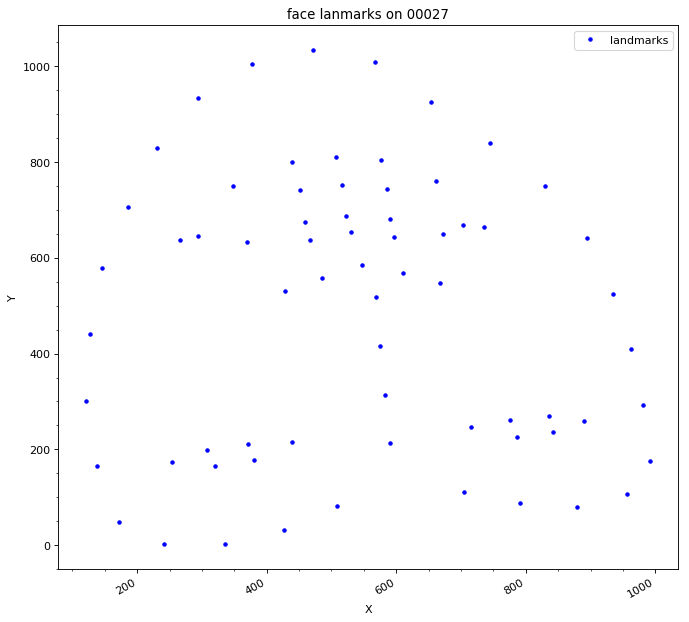

In [281]:
%pylab inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
num='00027'

x = [d[0] for d in Data2[num]['landmarks']]
y = [d[1] for d in Data2[num]['landmarks']]
 
# plt.grid(True)
line_0, = plt.plot(x,y, 'b.',  label='landmarks')
plt.legend(handles=[line_0])
plt.gcf().autofmt_xdate()
plt.ylabel('Y')
plt.xlabel('X')
plt.title("face lanmarks on "+num)

plt.grid(linestyle='-', linewidth='0.0')
plt.minorticks_on()

plt.show();

## Feature and label engineering

In [299]:
# feature vectors
X = [list(chain(*Data2[x]['landmarks'])) for x in Data2]

# label vectors
y_open_mouth = [Data2[y]['open_mouth'] for y in Data2]
y_smile = [Data2[y]['smile'] for y in Data2]

#### Distribution of classes / labels

In [300]:
def printLabelDistribution(y, name=''):
    counter = Counter(y)
    print("'%s' label distribution:\n\tnegative: %d\n\tpositive: %d\n" % (name, counter[0], counter[1]))

printLabelDistribution(y_open_mouth, 'open_mouth')
printLabelDistribution(y_smile, 'smile')

'open_mouth' label distribution:
	negative: 262
	positive: 38

'smile' label distribution:
	negative: 277
	positive: 23



Populating the interactive namespace from numpy and matplotlib


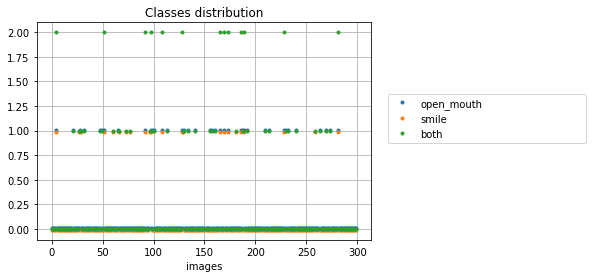

In [624]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import natsort

# dimension = EMOTION

s = y_smile#[:, dimension] #y_annotated[dimension]
order = sorted(range(len(s)), key=lambda k: s[k])

g1 = y_open_mouth
g2 = y_smile
g3 = [s+om for s,om in zip(y_smile, y_open_mouth)]

line_0, = plt.plot(np.array(g1)+0.01, '.',  label='open_mouth')
line_1, = plt.plot(np.array(g2)-0.01, '.', label='smile')
line_2, = plt.plot(np.array(g3), '.', label='both')
plt.grid(True)
plt.legend(handles=[line_0, line_1, line_2])
plt.legend(bbox_to_anchor=(1.02, .4, .65, .0), loc=3,ncol=1, mode="expand", borderaxespad=1.0)

plt.xlabel('images')
plt.title("Classes distribution")
plt.show()

### Oversampling
is advised due to uneven distribution of classes in order to have better accuracy

In [63]:
from imblearn.over_sampling import RandomOverSampler

def oversampling(X, y):
    ros = RandomOverSampler(ratio='auto')
    X_resampled, y_resampled = ros.fit_sample(X,y)
    
    print("dataset oversampled:\t %d -> %d" % ( len(y), len(y_resampled)))    
    return(X_resampled, y_resampled)

X_smile_resampled, y_smile_resampled = oversampling(X, y_smile)
X_open_mouth_resampled, y_open_mouth_resampled = oversampling(X, y_open_mouth)
# X_som_resampled, y_som_resampled = oversampling(X, [(i,j) for i,j in zip(y_open_mouth,y_smile)] )

dataset oversampled
	 300 -> 554
dataset oversampled
	 300 -> 524


### Train / Test split

In [509]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X, y_smile, test_size=0.25, random_state=42)
X_om_train, X_om_test, y_om_train, y_om_test = train_test_split(X, y_open_mouth, test_size=0.25, random_state=42)

In [510]:
X_s_rsmp, y_s_rsmp = oversampling(X_s_train, y_s_train)
X_s_test_rsmp, y_s_test_rsmp = oversampling(X_s_test, y_s_test)

X_om_rsmp, y_om_rsmp = oversampling(X_om_train, y_om_train)
X_om_test_rsmp, y_om_test_rsmp = oversampling(X_om_test, y_om_test)

dataset oversampled
	 225 -> 426
dataset oversampled
	 75 -> 128
dataset oversampled
	 225 -> 398
dataset oversampled
	 75 -> 126


## SVM Training (baseline model)
### Parameter tuning


In [283]:
from sklearn.svm import SVC, LinearSVC
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer

In [541]:
c_array = [0.00001,0.0001,0.001,0.01,0.1,1.0]

print('smile')
for c_val in c_array:
    cvs_s = cross_val_score(estimator = LinearSVC(), X=X, y=y_smile, cv=5, n_jobs=5, scoring='f1')
    print(c_val, np.mean(cvs_s), cvs_s)

print('open_mouth')
for c_val in c_array:
    cvs_s = cross_val_score(estimator = LinearSVC(), X=X, y=y_open_mouth, cv=5, n_jobs=5, scoring='f1')
    print(c_val, np.mean(cvs_s), cvs_s)

smile
1e-05 0.48 [0.57142857 0.         0.57142857 0.85714286 0.4       ]
0.0001 0.5666666666666667 [0.5        0.66666667 0.6        0.66666667 0.4       ]
0.001 0.5142857142857142 [0.57142857 0.66666667 0.66666667 0.         0.66666667]
0.01 0.5748473748473748 [0.57142857 0.28571429 0.46153846 0.66666667 0.88888889]
0.1 0.5942857142857142 [0.57142857 0.66666667 0.66666667 0.66666667 0.4       ]
1.0 0.5847619047619047 [0.57142857 0.66666667 0.42857143 0.85714286 0.4       ]
open_mouth
1e-05 0.5756756756756757 [0.66666667 0.5        0.4        0.93333333 0.37837838]
0.0001 0.7326972950771578 [0.60869565 0.73684211 0.61538462 0.93333333 0.76923077]
0.001 0.6561904761904762 [0.66666667 0.4        0.5        1.         0.71428571]
0.01 0.6884491978609625 [0.66666667 0.70588235 0.5        0.93333333 0.63636364]
0.1 0.7081742818584924 [0.66666667 0.73684211 0.5        0.92307692 0.71428571]
1.0 0.6409901926030959 [0.66666667 0.25806452 0.5        0.92307692 0.85714286]


In [542]:
svc_s_trained = LinearSVC(C=0.1, random_state=0)
svc_s_trained.fit(X_s_rsmp, y_s_rsmp)

f1_score(y_s_test_rsmp , svc_s_trained.predict(X_s_test_rsmp)), f1_score(y_s_test , svc_s_trained.predict(X_s_test))

(0.7272727272727273, 0.64)

In [543]:
svc_om_trained = LinearSVC(C=0.0001, random_state=0)
svc_om_trained.fit(X_om_rsmp, y_om_rsmp)

f1_score(y_om_test_rsmp , svc_om_trained.predict(X_om_test_rsmp)), f1_score(y_om_test , svc_om_trained.predict(X_om_test))

(0.9375, 0.7857142857142857)

## Used metrics:
- Dataset is split on TRAIN(75%) and TEST(25%) sets

- OVERSAMPLING is used due to the classes imbalance

- 5-fold CROSS-VALIDATION is performed on the train set in order to tune SVM's parameters

- F1 SCORING is used to test model's performane on the TEST set

## Final training and Model saving

In [561]:
from sklearn.externals import joblib

def checkFolder(filename):
    dir = os.path.dirname(filename)
    try:
        os.stat(dir)
    except:
        os.mkdir(dir) 

def saveModelFor(model, name, path):
    checkFolder(path)
    filename = os.path.join(path, 'svc_'+name+'.dump')
    _ = joblib.dump(model, filename, compress=9)
    print("'%s' model saved to <%s>" % (name,filename))
    
    
# svcTrained.fit(svc_X_train_oversampled, svc_y_train_oversampled)
# print(svcTrained)
save_path = os.path.abspath( os.path.join( os.getcwd(),  'files' ))


saveModelFor(model=svc_s_trained, name='smile', path = save_path)
saveModelFor(model=svc_om_trained, name='open_mouth', path = save_path)

'smile' model saved to <D:\Work\ADorable\files\svc_smile.dump>
'open_mouth' model saved to <D:\Work\ADorable\files\svc_open_mouth.dump>


## adorable-neutral-face-classification.py

In [626]:
import sys
import os
import dlib
import glob

def convertScale(coord, source=(0,100), target=(0,1000)):
    z = (coord - source[0]) / (source[1]-source[0])
    return z*target[1]

def _load_classifier(PATH, NAME):
    filename = os.path.join(PATH, 'svc_'+NAME+'.dump')
    model = joblib.load(filename)
    return model

model_path = os.path.abspath( os.path.join( os.getcwd(),  'files' ))
models = {}

for est in ['open_mouth','smile']:
    models[est] = _load_classifier(model_path, est)

Data3 = {}

predictor_path = os.path.abspath( os.path.join( os.getcwd(),  'files', 'shape_predictor_68_face_landmarks.dat' ) )#sys.argv[1]
faces_folder_path = os.path.abspath( os.path.join( os.getcwd(),  'test_data' ) )#sys.argv[2]

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)


for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
    print("Processing file: {}".format(f))
    filename = os.path.splitext(os.path.basename(f))[0]
    img = dlib.load_rgb_image(f)
    
    dets = detector(img, 1)
    for k, d in enumerate(dets):
        shape = predictor(img, d)
        
    #dlib.hit_enter_to_continue()
    
    # feature normalization
    
    cx = (shape.rect.tl_corner().x, shape.rect.br_corner().x)
    cy = (shape.rect.tl_corner().y, shape.rect.br_corner().y)

    vec = np.empty([68, 2], dtype = float)
    for b in range(shape.num_parts):
        vec[b] = [convertScale(shape.part(b).x, source = cx), convertScale(shape.part(b).y, source = cy)]
    
    Data3[filename] = {'landmarks':vec}  
    
    
# feature vectors
_X = [list(chain(*Data3[x]['landmarks'])) for x in Data3]

# classification
_y_open_mouth = models['open_mouth'].predict(_X)
_y_smile = models['smile'].predict(_X)

In [629]:
# result printing
print("%s\t%s\t%s" % ("open_mouth","smile","image"))

for v0,v1,v2 in zip(Data3,_y_open_mouth,_y_smile):
    print(" %d\t\t %d\t%s.jpg" % (v1,v2,v0))

open_mouth	smile	image
 1		 1	00027.jpg
 1		 1	00565.jpg
 1		 1	00800.jpg
 0		 0	16-JzRFVwkI.jpg
 1		 0	78Qbs4AQWjQ.jpg
 0		 0	87zM66jUCFE.jpg
 1		 1	93p2maQWyyE.jpg
 0		 0	DSC03052.jpg
 0		 0	k4kFyKjUoSU.jpg
 1		 1	MwIjq_cJp2Q.jpg
 0		 1	NP2GBlGDNIc.jpg
 1		 1	SE3vQCjERPU.jpg
 0		 0	sRPIdU305Os.jpg


### Investigation

In [612]:
import cv2
import numpy as np

img = cv2.imread(os.path.abspath( os.path.join( os.getcwd(),  'test_data','00800.jpg' )))
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp,img)

cv2.imwrite(os.path.abspath( os.path.join( os.getcwd(),  'sift_keypoints.jpg' )),img)

True